In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn import preprocessing

In [3]:
df1 = pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")
# df3 = pd.read_csv("/content/PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
# df5 = pd.read_csv("/content/PRSA_Data_Guanyuan_20130301-20170228.csv1")
df6 = pd.read_csv("/content/PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("/content/PRSA_Data_Huairou_20130301-20170228.csv")
# df8 = pd.read_csv("/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("/content/PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("/content/PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("/content/PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [4]:
frames = [df1, df2,df4,  df6,df7, df9,df10,df11, df12]
data = pd.concat(frames)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315576 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       315576 non-null  int64  
 1   year     315576 non-null  int64  
 2   month    315576 non-null  int64  
 3   day      315576 non-null  int64  
 4   hour     315576 non-null  int64  
 5   PM2.5    308860 non-null  float64
 6   PM10     310652 non-null  float64
 7   SO2      308205 non-null  float64
 8   NO2      306045 non-null  float64
 9   CO       299846 non-null  float64
 10  O3       305192 non-null  float64
 11  TEMP     315271 non-null  float64
 12  PRES     315273 non-null  float64
 13  DEWP     315266 non-null  float64
 14  RAIN     315277 non-null  float64
 15  wd       314053 non-null  object 
 16  WSPM     315329 non-null  float64
 17  station  315576 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 45.7+ MB


In [6]:
data.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [7]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,315576.000000,315576.000000,315576.000000,315576.000000,315576.000000,308860.000000,310652.000000,308205.000000,306045.000000,299846.000000,305192.000000,315271.000000,315273.000000,315266.000000,315277.000000,315329.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.413034,105.931414,15.766880,51.532686,1251.617437,56.176212,13.502835,1010.756294,2.534779,0.064656,1.703714
std,10122.120953,1.177199,3.448709,8.800106,6.922198,80.929541,92.356196,21.622805,34.815898,1169.129817,56.549509,11.445405,10.461083,13.794923,0.821598,1.238193
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,37.000000,2.000000,24.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,84.000000,7.000000,44.000000,900.000000,43.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,147.000000,19.000000,72.000000,1500.000000,80.000000,23.200000,1019.000000,15.200000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [8]:

data=data.rename(columns ={'wd':'wind_direction','DEWP':'dew_point_temp','TEMP':'temp','RAIN':'rain','WSPM':'wind_speed','PRES':'pressure'})

In [9]:
data.isna().sum()

No                    0
year                  0
month                 0
day                   0
hour                  0
PM2.5              6716
PM10               4924
SO2                7371
NO2                9531
CO                15730
O3                10384
temp                305
pressure            303
dew_point_temp      310
rain                299
wind_direction     1523
wind_speed          247
station               0
dtype: int64

In [10]:
data.dropna()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [11]:
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['PM2.5'].fillna(data['PM2.5'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

In [12]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [13]:
data.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [14]:
duplicate_months = data["month"].duplicated()
print(duplicate_months.sum())

315564


In [15]:
data = data.drop_duplicates(subset="month")

### ***DATA VISUALIZATION***

<ipython-input-16-1bae83bdec8b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig = sns.pointplot(x="month", y="PM2.5", data=data,color="#7FFFD4").set_xticklabels(labels)


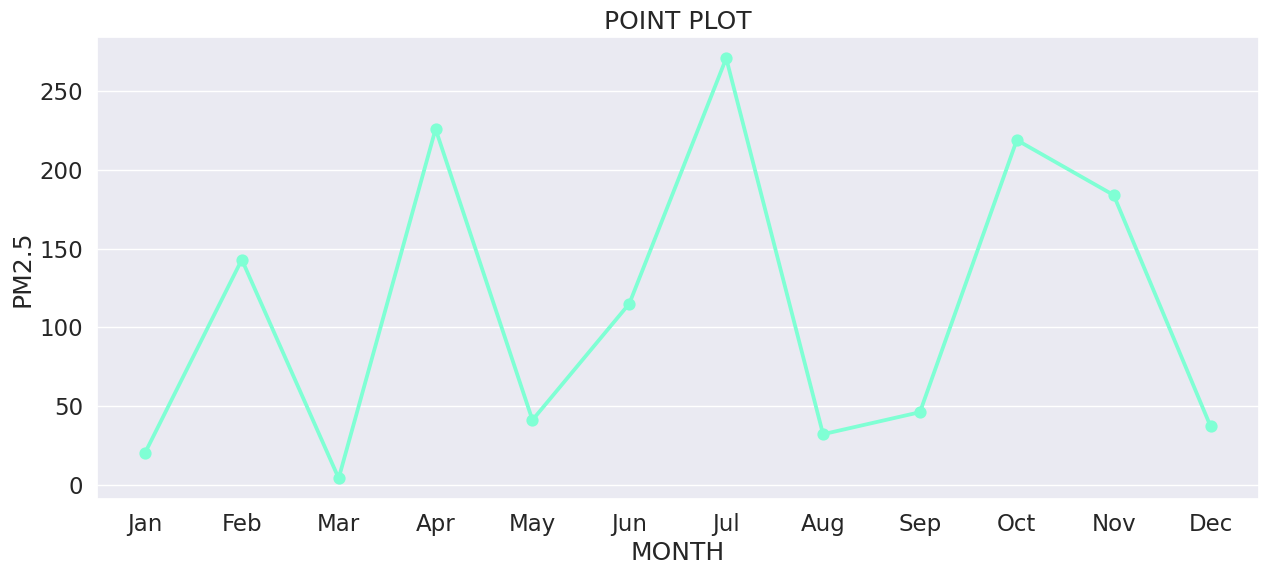

In [16]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = sns.pointplot(x="month", y="PM2.5", data=data,color="#7FFFD4").set_xticklabels(labels)
plt.xlabel("MONTH")
plt.ylabel("PM2.5")
plt.title("POINT PLOT")
plt.show(fig)

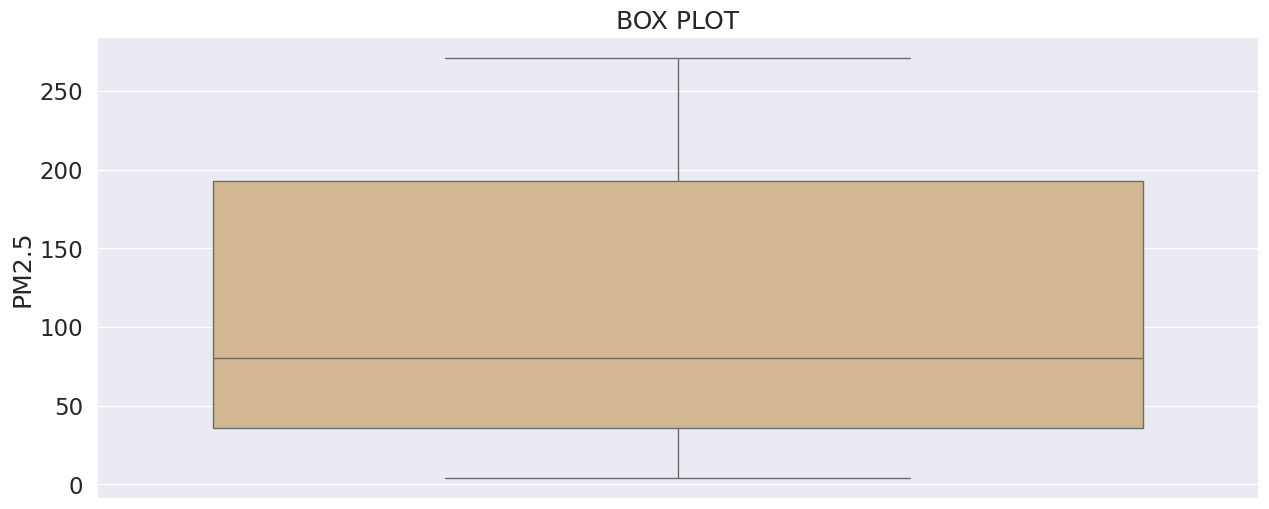

In [17]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
fig1=sns.boxplot(y=data["PM2.5"],color="#DEB887")
plt.title("BOX PLOT")
plt.show(fig1)

From the box plot abow, we can say that almost all the stations have lower PM2.5 values and the 25 to 75 percentile ranges from 25 to 150.And there are many outliers. The distribution is right skewed as we can see there are many values to the right and median to the left.

***DENSITY PLOT***

Text(0.5, 1.0, 'Density plot of the target variable')

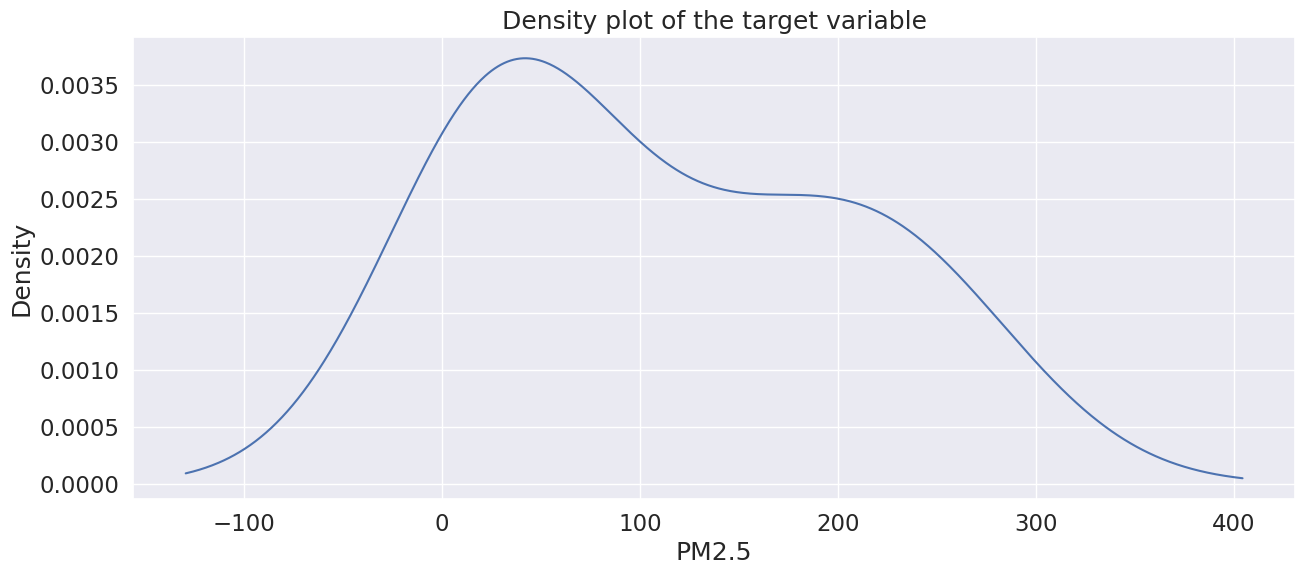

In [18]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
fig10=data['PM2.5'].plot.density()
plt.xlabel('PM2.5')
plt.title("Density plot of the target variable")

***Histogram Plot:***

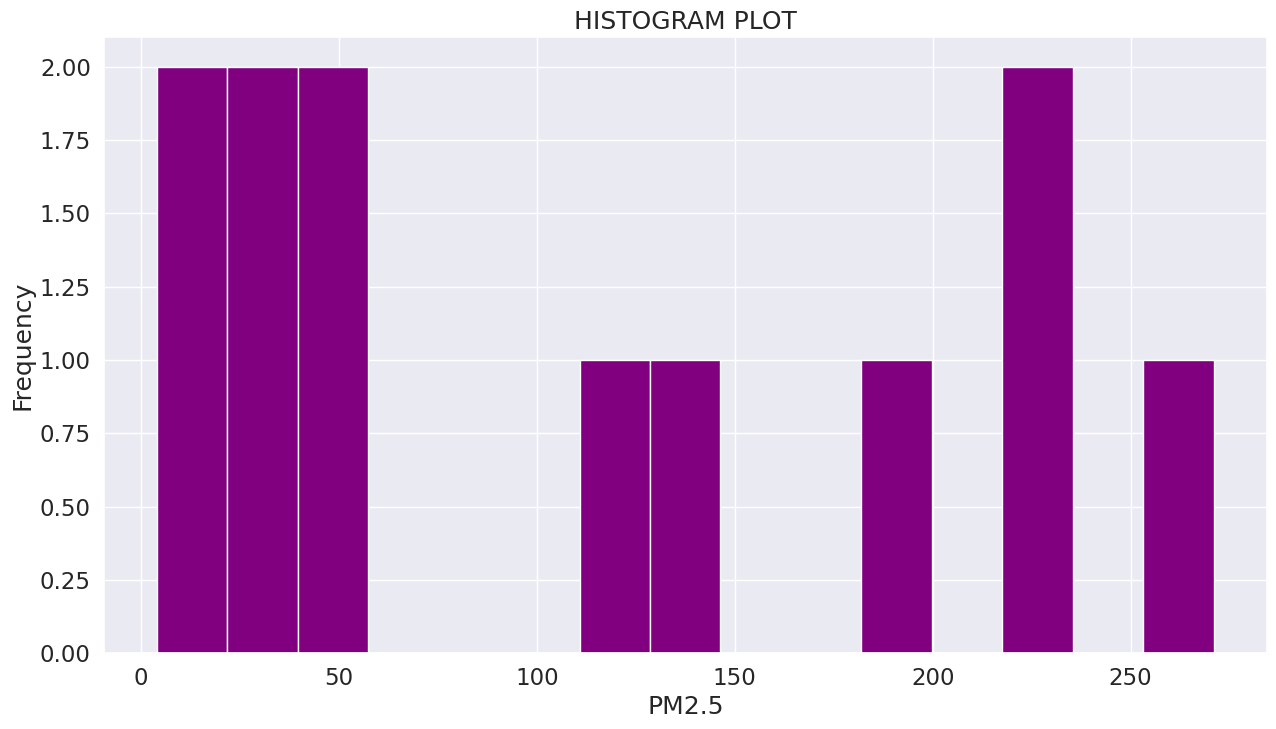

In [19]:
plt.figure(figsize=(15,6))
fig3=data['PM2.5'].hist(bins=15,figsize=(15,8),color="purple")
plt.title("HISTOGRAM PLOT")
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show(fig3)

***Correlation Matrix:***

Text(0.5, 1.0, 'Year Wise PM2.5 Level')

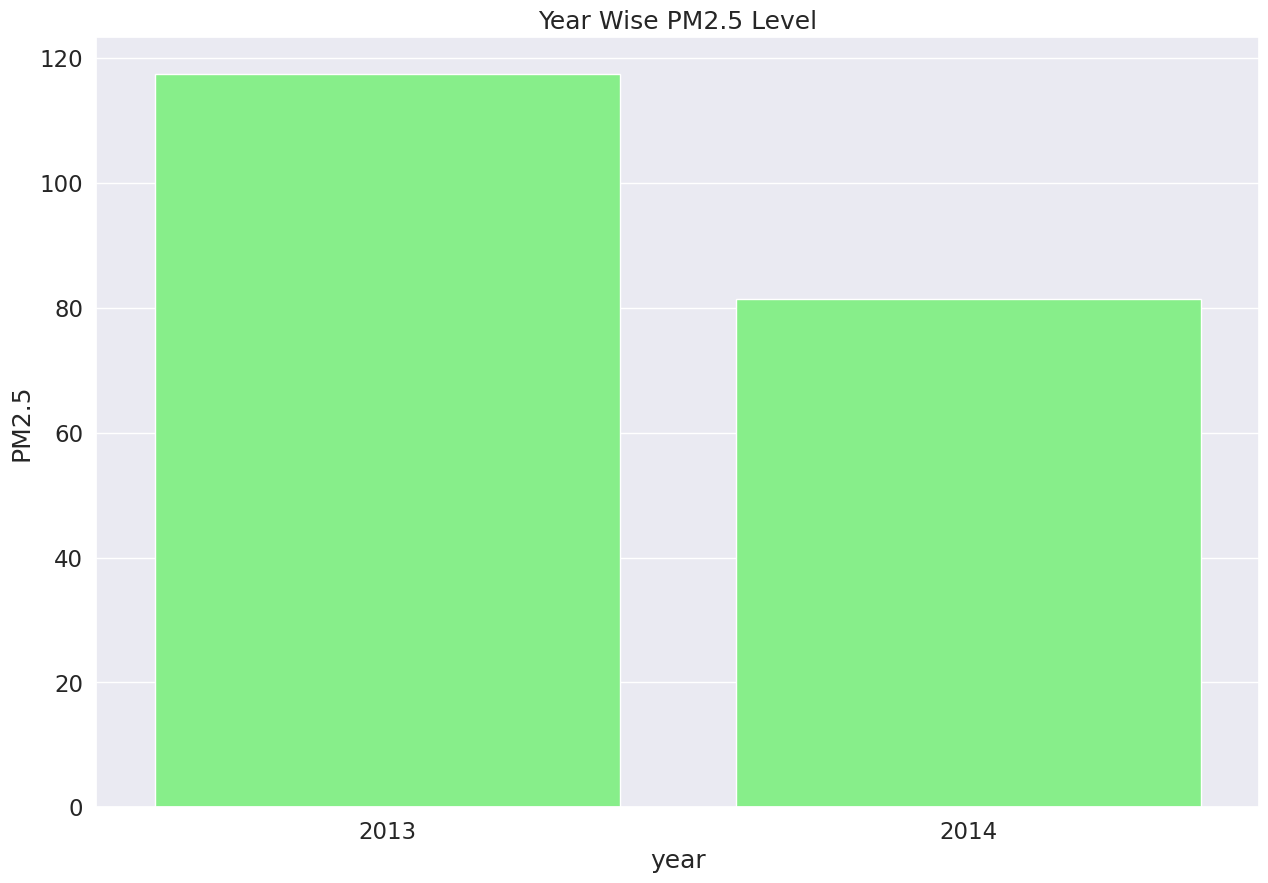

In [20]:
df = data[['PM2.5','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='year', y='PM2.5', data=df, color='#76ff7a')

plt.title('Year Wise PM2.5 Level')

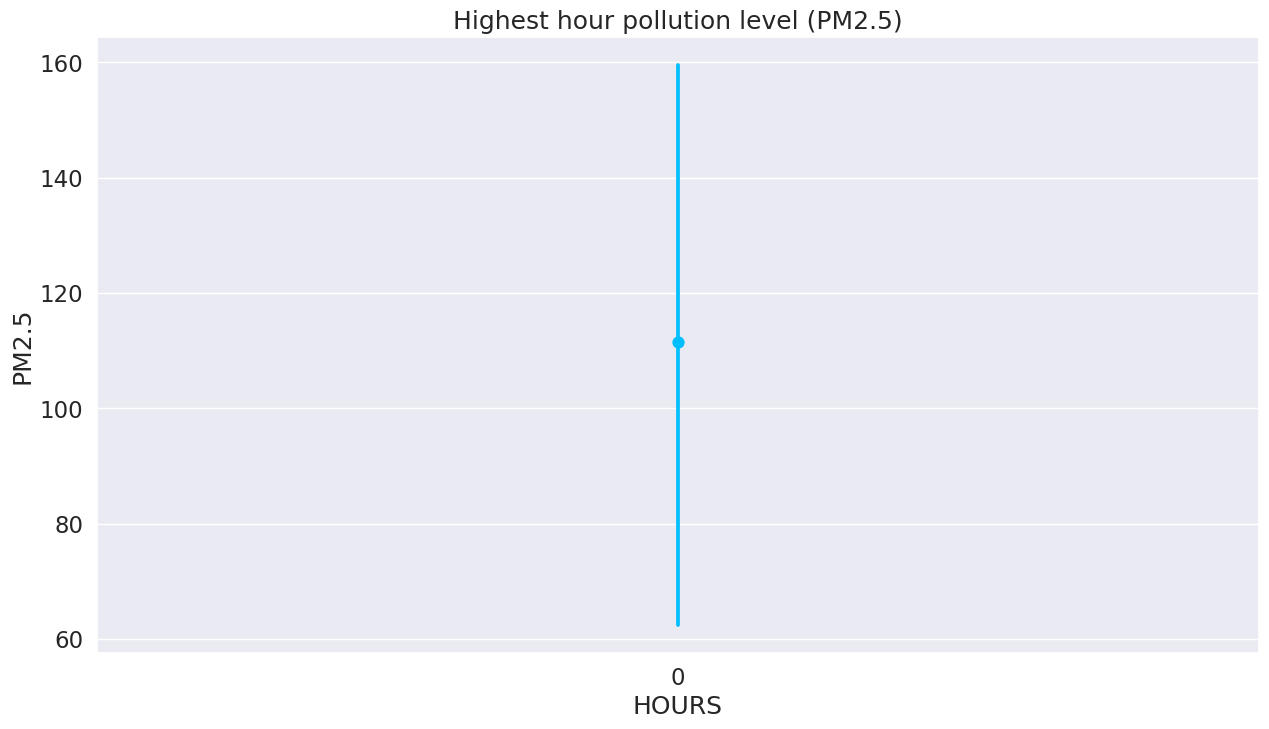

In [21]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
fig5=sns.pointplot(x='hour',y='PM2.5',data=data,color="#00bfff")
plt.xlabel("HOURS")
plt.ylabel("PM2.5")
plt.title("Highest hour pollution level (PM2.5)")
plt.show(fig5)


In [22]:
Q1=data['PM2.5'].quantile(0.25)
Q3=data['PM2.5'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=data[(data['PM2.5']<(Q1-1.5*IQR))|(data['PM2.5']>(Q3+1.5*IQR))]
print(df_out.shape)
data=data[~((data['PM2.5']<(Q1-1.5*IQR))|(data['PM2.5']>(Q3+1.5*IQR)))]
data.shape

157.0
(0, 18)


(12, 18)

<Axes: >

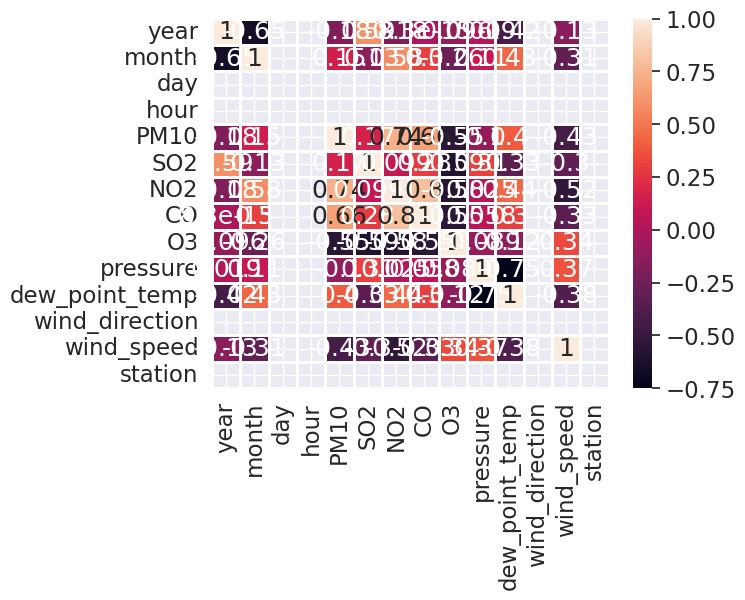

In [33]:
data = data.replace('WNW', np.nan)
data_corr = data.drop('PM2.5', axis=1)
sns.heatmap(data_corr.corr(), annot=True, linewidth = 0.75)

<Axes: >

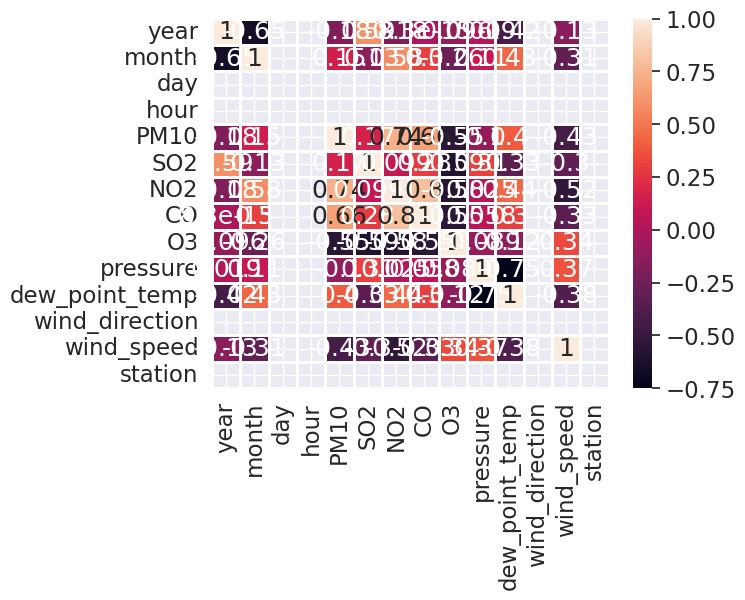

In [32]:
import numpy as np
import seaborn as sns

# 1. Replace 'WNW' with NaN before conversion (ensuring consistency):
data = data.replace('WNW', np.nan)

# 2. Convert string values to floats, handling potential errors:
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, filling errors with NaN
    except:
        print(f"Cannot convert column '{col}' to float. It might still contain non-numeric data.")

# 3. Drop the 'PM2.5' column and create the correlation matrix:
data_corr = data.drop('PM2.5', axis=1)
corr = data_corr.corr()

# 4. Create the heatmap with annotations and adjustments:
sns.heatmap(corr, annot=True, linewidth=0.75)


In [39]:
data= data.drop(data.columns[[10,13]], axis=1)

In [40]:
data.columns

Index(['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'pressure', 'wind_direction', 'wind_speed', 'PM2.5'],
      dtype='object')

In [41]:
#reindexing to make sure PM2.5 is the last column
data= data.reindex(columns = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'pressure', 'dew_point_temp',  'wind_direction',
       'wind_speed', 'station', 'PM2.5'])

In [42]:
data.columns

Index(['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'pressure', 'dew_point_temp', 'wind_direction', 'wind_speed', 'station',
       'PM2.5'],
      dtype='object')

In [51]:
#Independent variables and dependent variables and placed them into X and y respectively from the final dataset.
# "pm2.5"  it will be the target variable and placing it in a new variable y.
X = data.drop(['PM2.5'],axis =1 )
Y = data['PM2.5']

In [63]:
Y.isnull().sum()

0

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
Y.head()

0         4.0
744     226.0
1464     41.0
2208    115.0
2928    271.0
Name: PM2.5, dtype: float64

In [69]:
Y.tail()

5136    219.0
5880    184.0
6600     37.0
7344     20.0
8088    143.0
Name: PM2.5, dtype: float64

In [172]:
 #Stratified 80-20 train test split and keeping shuffle parameter true
x_train, x_test, y_train, y_test = train_test_split( X,Y, shuffle = True, test_size=0.5)

In [173]:
x_test.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,pressure,dew_point_temp,wind_direction,wind_speed,station
6600,2013,12,1,0,84.0,33.0,67.0,1000.0,1.0,1019.7,0.0,0.0,0.0,0.0
8088,2014,2,1,0,147.0,51.0,53.0,1600.0,6.0,1012.8,0.0,0.0,0.9,0.0
2208,2013,6,1,0,152.0,4.0,54.0,700.0,79.0,998.0,0.0,0.0,0.0,0.0
5880,2013,11,1,0,206.0,11.0,125.0,2600.0,43.0,1022.1,0.0,0.0,0.6,0.0
0,2013,3,1,0,4.0,4.0,7.0,300.0,77.0,1023.0,0.0,0.0,4.4,0.0


In [174]:
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (6, 14) (6,)
Test (6, 14) (6,)


In [175]:
# assigning preprocessing modules to variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()

In [176]:
# Fitting the categorical variables using label_encoder on the train and test data
x_train_sklern = x_train.copy()
x_test_sklern = x_test.copy()

x_train['wind_direction']= le.fit_transform(x_train['wind_direction'])
x_train['station']= le.fit_transform(x_train['station'])

x_test['wind_direction']= le.fit_transform(x_test['wind_direction'])
x_test['station']= le.fit_transform(x_test['station'])

In [177]:
x_train_sklern.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,pressure,dew_point_temp,wind_direction,wind_speed,station
5136,2013,10,1,0,241.0,23.0,115.0,2100.0,1.0,1011.1,0.0,0.0,1.2,0.0
1464,2013,5,1,0,248.0,18.0,61.0,600.0,47.0,1012.2,0.0,0.0,1.0,0.0
2928,2013,7,1,0,247.0,13.0,92.0,2500.0,2.0,996.1,0.0,0.0,0.8,0.0
3672,2013,8,1,0,10.0,3.0,39.0,400.0,72.0,996.4,0.0,0.0,1.2,0.0
4416,2013,9,1,0,165.0,8.0,89.0,700.0,1.0,1007.8,0.0,0.0,1.3,0.0


In [178]:
## Fitting the numerical variables using StandardScaler on the train and test data
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns )
x_test =  pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns )

In [179]:
X_train = data.drop(['PM2.5'], axis=1)
y_train = data['PM2.5']

In [180]:
from sklearn import linear_model

In [181]:
# using stochastic gradient descent regressor to train the model
sgd = linear_model.SGDRegressor(shuffle=False)
type(sgd)

sklearn.linear_model._stochastic_gradient.SGDRegressor

In [182]:
print(x_train.shape)
print(y_train.shape)

(6, 14)
(12,)


In [183]:
imp.fit(x_train)

SimpleImputer()

In [184]:
x_train_transformed = imp.transform(x_train)

In [185]:
print(f"x_train_transformed shape: {x_train_transformed.shape}")
print(f"y_train shape: {y_train.shape}")

x_train_transformed shape: (6, 14)
y_train shape: (12,)


In [195]:
# Assuming you want to keep the first 9 samples from both:
x_train_subset = x_train_transformed[:6]  # Select the first 9 rows
y_train_subset = y_train[:6]             # Select the first 9 elements

# Now try fitting with subsets:
sgd.fit(x_train_subset, y_train_subset)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(shuffle=False)

In [196]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')  # Or a different strategy

In [197]:
# Fitting the data
sgd.fit(x_train_subset, y_train_subset )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(shuffle=False)

In [198]:
# Predicting the y values using train and test data

y_train_pred = sgd.predict(x_train_subset)

In [199]:
y_pred = sgd.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [203]:
# Printing the Model score, mean absolute/square errors  & RMSE for train and test predictions
print("Model Score: %.2f" % sgd.score(x_test, y_test))
print ("MAE on Test: %.2f" %mean_absolute_error(y_test, y_pred))
# print ("MAE on Train: %.2f" %mean_absolute_error(y_train, y_train_pred))
# print("MSE on Train: %.2f" % mean_squared_error(y_train, y_train_pred))
print("MSE on Test: %.2f" % mean_squared_error(y_test, y_pred))
# print('R2 on train:', r2_score(y_train, y_train_pred))
print('R2 on test:', r2_score(y_test, y_pred))


Model Score: -2.18
MAE on Test: 107.37
MSE on Test: 19165.27
R2 on test: -2.1756136021314414


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [205]:
# using  custom sgd regressor
sgd = linear_model.SGDRegressor(alpha = .0001,
                                loss = 'epsilon_insensitive',
                                epsilon = 6,
                                max_iter=10000,
                                penalty='l1',
                                learning_rate='adaptive', eta0 = .1, power_t = .1)
# sgd.fit(x_train, y_train)
# y_pred = sgd.predict(x_test)
print ("Mean Absolute Test Error: %.2f" %mean_absolute_error(y_test, y_pred))
print("MSE on Test: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 on test:', r2_score(y_test, y_pred))

Mean Absolute Test Error: 107.37
MSE on Test: 19165.27
R2 on test: -2.1756136021314414


In the above tuning, we observe that changing the loss function to epsilon_insensitive, which helps to focus more on linear loss than squared loss after a certain point(epsilon). It helps in ignoring errors upto a certain distance and we have increased the default value of .1 to 6. Changing the penalty from l2 to l1 allows feature selection to bring sparsity to the model and explore the data. Also, doing adaptive learning and setting the initial learning rate eta0 to .1 has helped us reduce the overall MAE & r2 compared to default . Since the data is randomized during after each SGD run, it is best to not mention the numerical values. We observe that these hyper-parameter tuning allowed us to reduce the error.

Learning rate, batch size and momentum are three important hyperparameters in the SGD algorithm
Grid search
Grid search is arguably the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results
Random search
Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.
Batch gradient  can also be used.

In [210]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
model = LogisticRegression()

# Fit the model to your training data (X_train, y_train)
model.fit(X_train, y_train)

# Make predictions on your test data (X_test)
y_pred = model.predict(x_test)

# Evaluate model performance (optional)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)


Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [212]:
from sklearn.svm import SVR

# Create an SVR object with desired parameters
model = SVR(kernel='linear', C=1.0)  # You can adjust these parameters

# Fit the model to your training data (X_train, y_train)
model.fit(X_train, y_train)

# Make predictions on your test data (X_test)
y_pred = model.predict(x_test)

# Evaluate model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 12876593.093055407
R-squared: -2132.6034398085044


In [213]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object with desired parameters
model = DecisionTreeRegressor(max_depth=3)  # You can adjust this parameter

# Fit the model to your training data (X_train, y_train)
model.fit(X_train, y_train)

# Make predictions on your test data (X_test)
y_pred = model.predict(x_test)

# Evaluate model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 17306.5
R-squared: -1.8676224886659152


In [214]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor object with desired parameters
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust this parameter

# Fit the model to your training data (X_train, y_train)
model.fit(X_train, y_train)

# Make predictions on your test data (X_test)
y_pred = model.predict(x_test)

# Evaluate model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 11014.793333333335
R-squared: -0.825110165005869


In [220]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [221]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [222]:
grid_search = GridSearchCV(model, param_grid, cv=5)  # cv=5 for 5-fold cross-validation


In [223]:
random_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10)  # Try 10 samples


In [228]:
print(grid_search.estimator)

KNeighborsRegressor()


In [229]:
print(grid_search.estimator.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [230]:
param_grid = {
    # Remove the 'C' parameter
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(x_train_subset, y_train_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [231]:
grid_search.fit(x_train_subset, y_train_subset)  # Or random_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [232]:
best_params = grid_search.best_params_  # Or random_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_


In [234]:
y_pred = best_model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [237]:
from sklearn.model_selection import GridSearchCV
# Import your model of choice (e.g., LogisticRegression, SVR, DecisionTreeRegressor, etc.)
from sklearn.metrics import mean_squared_error, r2_score  # Example metrics for regression

# Define your model (replace with your chosen model)
model = DecisionTreeRegressor()

# Define hyperparameter grid (adjust parameters and values as needed)
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 5, 10]}

# Create and fit GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Use best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print evaluation metrics (replace with relevant metrics for your task)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1}
Best Cross-Validation Score: 0.6360848533966207
Mean Squared Error: 15671.833333333334
R-squared: -1.596764320069961
